* Student name: Guofa Shou
* Student pace: self paced

## Netflix Moive and TV Shows Recommendation system

In this notebook, I am going to do EDA on Netflix Moives and TV Shows: https://www.kaggle.com/datasets/shivamb/netflix-shows, as well as the Recommendation system

#### Contents of This Notebook

- EDA for different columns of the dataset using different types of visualizations
- Recommendation system:Content-based recommendation system with different combinations of features

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [12]:
# load data
df = pd.read_csv('./data/netflix_titles.csv')
# The information of all data
print(df.info())
# the first 5 rows of the data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

- It has a total of 8807 entries and 12 columns.
- There are some null values in 6 columns

### Deal with missing data

In [13]:
for column in df.columns:
    missing_rate = df[column].isna().sum() / df.shape[0]*100 
    if missing_rate > 0 :
        print("missing rate for '{}': {}%".format(column,round(missing_rate,2)))

missing rate for 'director': 29.91%
missing rate for 'cast': 9.37%
missing rate for 'country': 9.44%
missing rate for 'date_added': 0.11%
missing rate for 'rating': 0.05%
missing rate for 'duration': 0.03%


In [14]:
# There are six columns have missing values
# director:account for 1/3, this one is important 
#          since people may like the movie/TV show from the same director, 
#          Therefore, I replace it with nodata
# cast: same as director, replace it with nodata
# country: this one is also important, instead of replacing with nodata, 
#          I will replace it with the most common country
# data_added, rating, duration: just drop these entries
df['director'].replace(np.nan,'nodata',inplace=True)
df['cast'].replace(np.nan,'nodata',inplace=True)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df.dropna(inplace=True)
# Just in case, drop duplicates if exist
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


### Go through each column one by one

In [15]:
# The column: show_id
print(len(df['show_id'].unique()))
# It seems show_id in each entry is different but uninformative.
# Therefore, I just remove it
df = df.iloc[:,1:]
df.info()

8790
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   cast          8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [16]:
# The column: type
colors_movietv = {'Movie' : 'Lightcoral',
                  'TV Show': 'Royalblue'}

df_notypes = df['type'].value_counts()
print(df_notypes.head())
# Visualization of number of TV show and Movies in pie chart
fig= px.pie(df, names = df_notypes.index,
       values = df_notypes.values,
       color_discrete_sequence = [colors_movietv['Movie'],colors_movietv['TV Show']],
       title = 'Movie ({}) vs. TV show ({})'.format(df_notypes.values[0],df_notypes.values[1]))
fig.update_layout(
    autosize=False,
    width=400,
    height=400)
fig.show()
fig.write_image("figures/notypes.png")

Movie      6126
TV Show    2664
Name: type, dtype: int64


In [17]:
# The column: title
print("Unique values in 'title': {}".format(len(df['title'].unique())))
print('The titles with top 10 movie/tv shows:\n')
print(df['title'].value_counts()[1:11])
# They are all different

Unique values in 'title': 8790
The titles with top 10 movie/tv shows:

Glowing Embers                              1
The Love Affair                             1
A Private War                               1
He-Man and the Masters of the Universe      1
Two Fathers                                 1
Yes or No                                   1
Game Over (Tamil Version)                   1
David Cross: Making America Great Again!    1
Three                                       1
For Your Own Good                           1
Name: title, dtype: int64


In [18]:
# I noticed there are some entries have ',', therefore, I create a function to unpack these items
def getunpackedvals(df,colname):
    # Get the unpacked values from a column in a dataframe, which 
    # may have ',' and need to be splitted into multiple items
    collist = df[colname].tolist()
    col_uq = []
    for val in collist:
        if val.find(',')>0:
            vals = val.split(', ')
#             print("'{}' split into {}".format(val,vals))
            for valii in vals:
                if valii.find(',') > 0 or valii.find(' , ') > 0:
                    valiis = valii.split(',')
                    #print("'{}' split into {}".format(valii,valiis))
                    for valiii in valiis:
                        if len(valiii) > 0:
                            col_uq.append(valiii)
                    
                else:
                    col_uq.append(valii)
        else:
             col_uq.append(val)
    df_colname = pd.DataFrame()
    df_colname[colname] = col_uq  
    print('number of missing values {}\n'.format(df_colname.isnull().sum()))
    if len(df_colname[df_colname[colname].str.contains(',')]) >0:
        print(df_colname[df_colname[colname].str.contains(',')])
        # replace ', '
    return df_colname

number of missing values director    0
dtype: int64

Unique values in 'director': 4992

The directors with top 10 movie/tv shows:



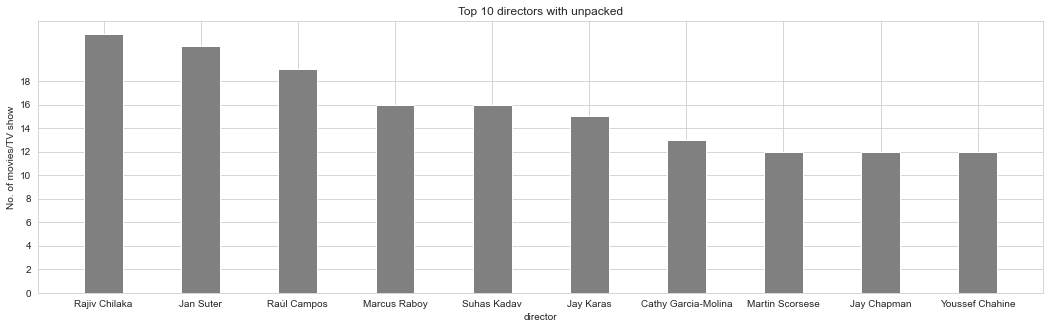

In [19]:
# The column: director, with unpacked
colname = 'director'
df_tmp = getunpackedvals(df,colname)
print("Unique values in '{}': {}\n".format(colname,len(df_tmp[colname].unique())))
print('The directors with top 10 movie/tv shows:\n')
# bar plot for the top 10 directors
fig = plt.figure(figsize = (18, 5)) 
rowidx = range(1,11)
plt.bar(df_tmp[colname].value_counts()[rowidx].index, df_tmp[colname].value_counts()[rowidx].values, color ='gray',
        width = 0.4) 
plt.yticks(np.arange(0, 20, 2))
plt.xlabel(colname)
#plt.xticks(rotation=45)
plt.ylabel("No. of movies/TV show")
plt.title("Top 10 " + colname + 's with unpacked')
plt.show()
fig.savefig('figures/top10'+colname + 'unpacked.png')

Unique values in 'director': 4527

The directors with top 10 movie/tv shows:



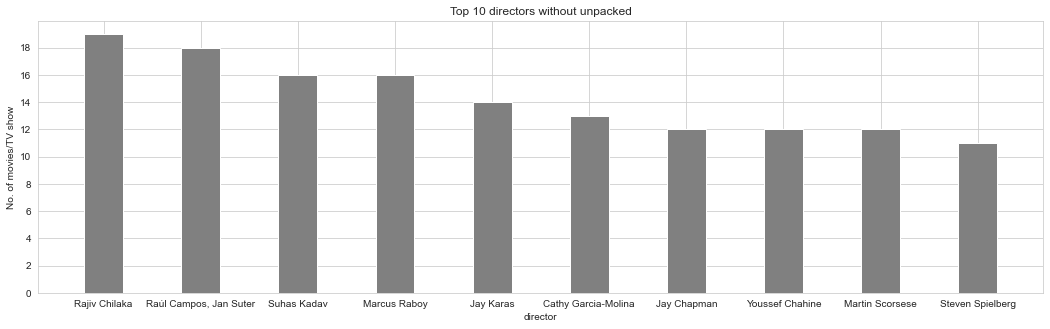

In [20]:
# The column: director, without unpacked
print("Unique values in '{}': {}\n".format(colname,len(df[colname].unique())))
print('The directors with top 10 movie/tv shows:\n')
# bar plot for the top 10 directors
fig = plt.figure(figsize = (18, 5)) 
plt.bar(df[colname].value_counts()[rowidx].index, df[colname].value_counts()[rowidx].values, color ='gray',
        width = 0.4) 
plt.yticks(np.arange(0, 20, 2))
plt.xlabel(colname)
#plt.xticks(rotation=45)
plt.ylabel("No. of movies/TV show")
plt.title("Top 10 " + colname + 's without unpacked')
plt.show()
fig.savefig('figures/top10'+colname+'wounpacked.png')

In [21]:
# The column: cast
colname = 'cast'
print("Unique values in '{}': {}\n".format(colname,len(df[colname].unique())))
print('The ' + colname + ' with top 10 movie/tv shows:')
print(df[colname].value_counts()[1:11])
# examine one set of cast:
df[df[colname]== df[colname].value_counts().index[2]]

Unique values in 'cast': 7679

The cast with top 10 movie/tv shows:
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Kevin Hart                                                                                                                 6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Craig Sechler                                                                                                              6
David Spade, London Hughes, Fortune Feimster             

type                                   title  \
39   TV Show                            Chhota Bheem   
406    Movie            Chhota Bheem - Neeli Pahaadi   
407    Movie                   Chhota Bheem & Ganesh   
408    Movie      Chhota Bheem & Krishna: Mayanagari   
410    Movie      Chhota Bheem And The Broken Amulet   
411    Movie  Chhota Bheem And The Crown of Valhalla   
412    Movie    Chhota Bheem and the Incan Adventure   
413    Movie     Chhota Bheem and The ShiNobi Secret   
414    Movie                Chhota Bheem Aur Hanuman   
416    Movie     Chhota Bheem aur Krishna vs Zimbara   
419    Movie           Chhota Bheem: Bheem vs Aliens   
420    Movie    Chhota Bheem: Dholakpur to Kathmandu   
421    Movie                Chhota Bheem: Dus Pe Dus   
424    Movie       Chhota Bheem: The Rise of Kirmada   

                     director  \
39                     nodata   
406             Rajiv Chilaka   
407             Rajiv Chilaka   
408             Rajiv Chilaka   
410             Rajiv Chilaka   
411             Rajiv Chilaka   
412             Rajiv Chilaka   
413             Rajiv Chilaka   
414             Rajiv Chilaka   
416             Rajiv Chilaka   
419             Rajiv Chilaka   
420             Rajiv Chilaka   
421  Rajiv Chilaka, Owll Mina   
424             Rajiv Chilaka   

                                                  cast        country  \
39   Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...          India   
406  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
407  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
408  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
410  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...          India   
411  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
412  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
413  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
414  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
416  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
419  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
420  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
421  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   
424  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  United States   

             date_added  release_year rating   duration  \
39   September 16, 2021          2021  TV-Y7  3 Seasons   
406       July 22, 2021          2013  TV-Y7     64 min   
407       July 22, 2021          2009  TV-Y7     68 min   
408       July 22, 2021          2011  TV-Y7     67 min   
410       July 22, 2021          2013  TV-Y7     64 min   
411       July 22, 2021          2013  TV-Y7     64 min   
412       July 22, 2021          2013  TV-Y7     65 min   
413       July 22, 2021          2013  TV-Y7     64 min   
414       July 22, 2021          2012  TV-Y7     68 min   
416       July 22, 2021          2013  TV-Y7     64 min   
419       July 22, 2021          2010  TV-Y7     69 min   
420       July 22, 2021          2012  TV-Y7     70 min   
421       July 22, 2021          2014  TV-Y7     63 min   
424       July 22, 2021          2012  TV-Y7     68 min   

                                   listed_in  \
39                                  Kids' TV   
406                 Children & Family Movies   
407                 Children & Family Movies   
408                 Children & Family Movies   
410                 Children & Family Movies   
411                 Children & Family Movies   
412                 Children & Family Movies   
413                 Children & Family Movies   
414                 Children & Family Movies   
416                 Children & Family Movies   
419  Children & Family Movies, Sports Movies   
420                 Children & Family Movies   
421                 Children & Family Movies   
424              

number of missing values cast    0
dtype: int64

Unique values in 'cast': 36393

The cast with top 10 movie/tv shows:



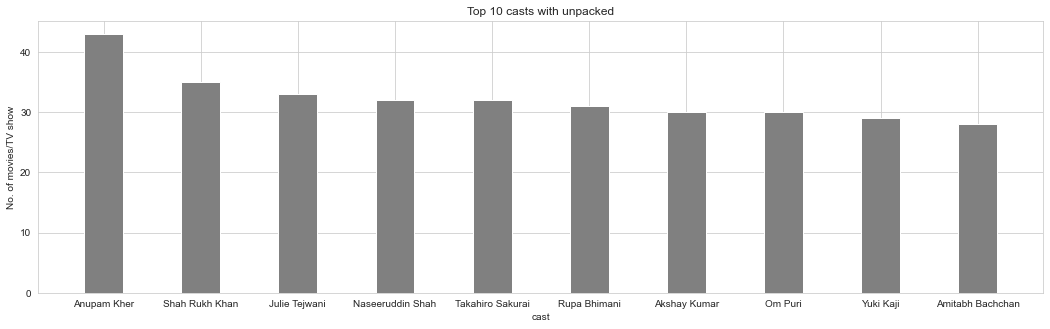

In [22]:
# cast have more than one actors/actress, unpack them and plot the top 10 
df_tmp = getunpackedvals(df,colname)
print("Unique values in '{}': {}\n".format(colname,len(df_tmp[colname].unique())))
print('The ' + colname +' with top 10 movie/tv shows:\n')
# bar plot for the top 10 directors
fig = plt.figure(figsize = (18, 5)) 
rowidx = range(1,11)
plt.bar(df_tmp[colname].value_counts()[rowidx].index, df_tmp[colname].value_counts()[rowidx].values, color ='gray',
        width = 0.4) 
#plt.yticks(np.arange(0, 20, 2))
plt.xlabel(colname)
#plt.xticks(rotation=45)
plt.ylabel("No. of movies/TV show")
plt.title("Top 10 " + colname + 's with unpacked')
plt.show()
fig.savefig('figures/top10' + colname +'unpacked.png')
# the results seems quite different as compared to the data without unpack

number of missing values country    0
dtype: int64

               country
241      , South Korea
446  , France, Algeria
Unique values in 'country': 124

The country with top 10 movie/tv shows:



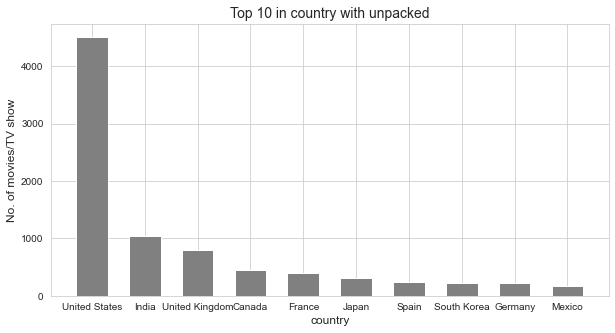

In [23]:
# country have more than one values, unpack them and plot the top 10 
colname = 'country'
df_tmp = getunpackedvals(df,colname)
print("Unique values in '{}': {}\n".format(colname,len(df_tmp[colname].unique())))
print('The ' + colname +' with top 10 movie/tv shows:\n')
# bar plot for the top 10 directors
fig = plt.figure(figsize = (10, 5)) 
rowidx = range(0,10)
plt.bar(df_tmp[colname].value_counts()[rowidx].index, df_tmp[colname].value_counts()[rowidx].values, color ='gray',
        width = 0.6) 
#plt.yticks(np.arange(0, 20, 2))
plt.xlabel(colname,fontsize=12)
#plt.xticks(rotation=45)
plt.ylabel("No. of movies/TV show",fontsize=12)
plt.title("Top 10 in " + colname + ' with unpacked',fontsize=14)
plt.show()
fig.savefig('figures/top10' + colname +'unpacked.png')

In [24]:
# The column: date_added
colname = 'date_added'
df[colname + 'dt'] = pd.to_datetime(df[colname])
df['year_added'] = df[colname + 'dt'].apply(lambda x: x.year)
df.head()

type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water           nodata   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans           nodata   
4  TV Show           Kota Factory           nodata   

                                                cast        country  \
0                                             nodata  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                             nodata  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description date_addeddt  year_added  
0  As her father nears the end of his life, filmm...   2021-09-25        2021  
1  After crossing paths at a party, a Cape Town t...   2021-09-24        2021  
2  To protect his family from a powerful drug lor...   2021-09-24        2021  
3  Feuds, flirtations and toilet talk go down amo...   2021-09-24        2021  
4  In a city of coaching centers known to train I...   2021-09-24        2021

In [25]:
# the newly added column: year_added
colname = 'year_added'
print("Unique values in '{}': {}\n".format(colname,len(df[colname].unique())))
df_tmp = df[colname].value_counts()

Unique values in 'year_added': 14



release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1030
2018    1146
2019    1030
2020     953
2021     592
Length: 74, dtype: int64

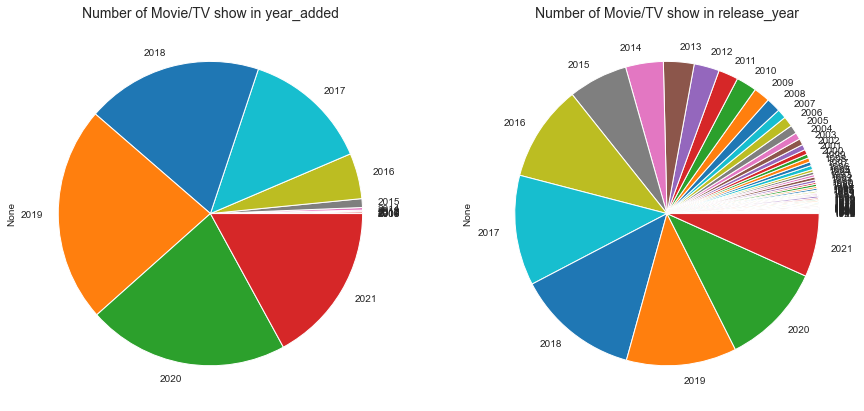

In [26]:
# I will combine two columns together for visualization: 'year_added','release_year'
colnames = ['year_added','release_year']
fig,ax = plt.subplots(1,2,figsize = (15, 8))
for ii, colname in enumerate(colnames):
    df.groupby(colname).size().plot(kind = 'pie',ax=ax[ii])
    ax[ii].set_title('Number of Movie/TV show in ' + colname,fontsize=14)
df.groupby(colnames[1]).size()

##### Observations regarding year_added and release_year
- year_added: from 2010 to 2021, years before 2015 only have a very small percentage.Therefore, I further take plot to take a look the years between 2015 and 2021 for movies and TV shows
- release_year: it has a broad range back to 1925. As a comparison, I will also take a look the years between 2015 and 2021

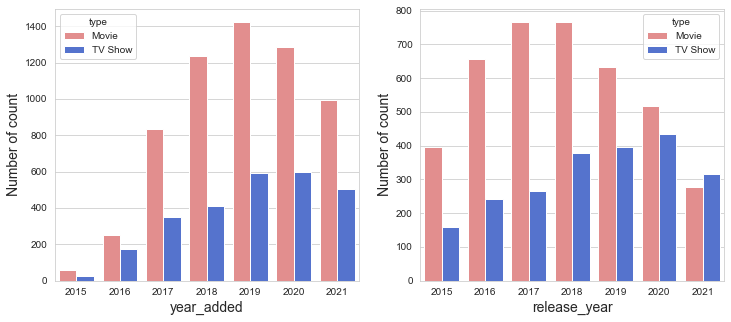

In [74]:
fig,ax = plt.subplots(1,2,figsize = (12, 5))
for ii, colname in enumerate(colnames):
    df_2015 = df[df[colname] >= 2015]
    sns.countplot(df_2015[colname], 
              hue = df_2015['type'],
              palette = colors_movietv,ax=ax[ii])
    ax[ii].set_xlabel(colname,fontsize=14)
    ax[ii].set_ylabel('Number of count',fontsize=14)   
fig.savefig('figures/numofcounts2015_2021.png')

##### In general, there are more movies than TV shows in each year

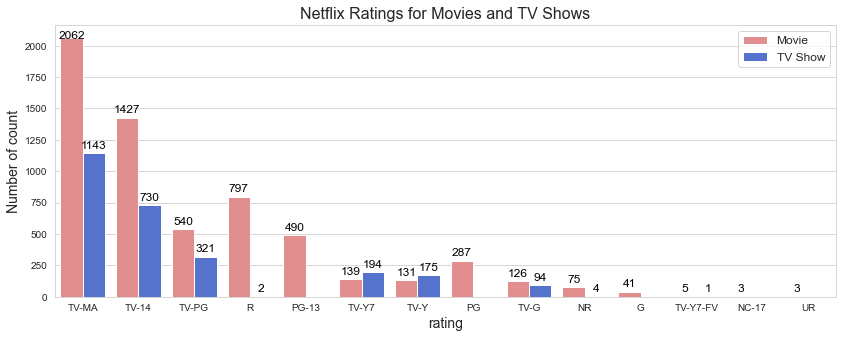

In [28]:
# the column: rating
colname = 'rating'
fig,ax = plt.subplots(figsize = (14, 5))
sns.countplot(df[colname], 
              hue = df['type'],
              palette = colors_movietv,order=df[colname].value_counts().index,ax=ax)
for p in ax.patches:
    if p.get_height()>2000:
        y = p.get_height()+60
    else:
        y = p.get_height()+100
    if np.isnan(p.get_height()):
        val = 0
    else:
        val = int(p.get_height())
    ax.annotate("{}".format(val), (p.get_x()+0.2, y), ha='center', va='top', color='black', size=12)
plt.xlabel(colname,fontsize=14)
plt.legend(fontsize=12,loc="upper right")
plt.ylabel('Number of count',fontsize=14)  
plt.title('Netflix Ratings for Movies and TV Shows',fontsize=16)
plt.show()
fig.savefig('figures/' + colname +'count.png')

#####  TV-MA, TV-14, TV-PG are the three ratings with top three counts

In [29]:
# The column: duration
colname = 'duration'
df[colname].value_counts()
# It have two units, i.e., Season(s) or min, corresponding to TV shows and Movie
# Create a new column to save the duration_time after removing units
df['duration_time']= df['duration'].apply(lambda x: x.replace(' min','').replace(' Seasons','').replace(' Season',''))
df['duration_time']= df['duration_time'].astype(int)
df['duration_time'].value_counts()

1      1791
2       421
3       199
90      152
97      146
       ... 
200       1
208       1
224       1
312       1
191       1
Name: duration_time, Length: 210, dtype: int64

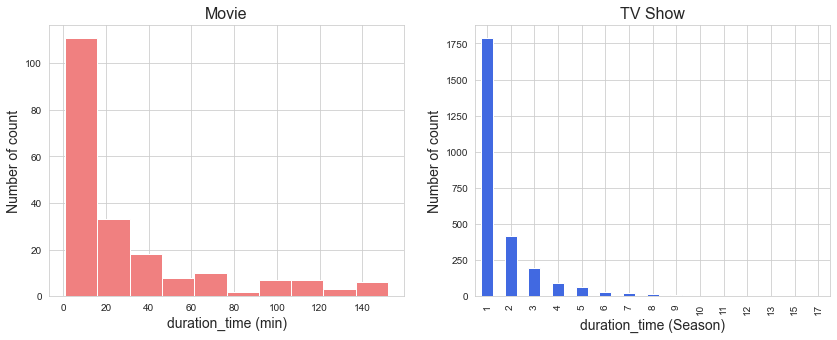

In [30]:
colname = 'duration_time'
units = {'Movie': 'min',
         'TV Show': 'Season'}
fig,ax = plt.subplots(1,2,figsize = (14, 5))
for ii,key in enumerate(list(colors_movietv.keys())):
    if key == 'TV Show':# display in the format of bar
        df[df['type'] == key].groupby(colname).size().plot(kind = 'bar',color=colors_movietv[key],ax=ax[ii])
    else: # display in the format of histogram since there are too many unique values for Movie
        df[df['type'] == key].groupby(colname).size().plot(kind='hist',color = colors_movietv[key],ax=ax[ii])
    ax[ii].set_xlabel(colname+' (' + units[key] + ')',fontsize=14)
    ax[ii].set_ylabel('Number of count',fontsize=14)
    ax[ii].set_title(key,fontsize=16)
fig.savefig('figures/' + colname +'count.png')

number of missing values listed_in    0
dtype: int64

Unique values in 'listed_in': 42

The listed_in with top 10 movie/tv show:



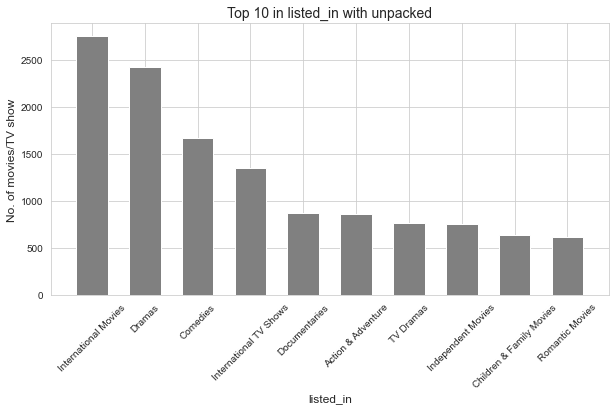

In [31]:
# The column: listed_in
colname = 'listed_in'
df_tmp = getunpackedvals(df,colname)
print("Unique values in '{}': {}\n".format(colname,len(df_tmp[colname].unique())))
print('The ' + colname +' with top 10 movie/tv show:\n')
# bar plot for the top 10 directors
fig = plt.figure(figsize = (10, 5)) 
rowidx = range(0,10)
plt.bar(df_tmp[colname].value_counts()[rowidx].index, df_tmp[colname].value_counts()[rowidx].values, color = 'gray',
        width = 0.6) 
#plt.yticks(np.arange(0, 20, 2))
plt.xlabel(colname,fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("No. of movies/TV show",fontsize=12)
plt.title("Top 10 in " + colname + ' with unpacked',fontsize=14)
plt.show()
fig.savefig('figures/top10' + colname +'unpacked_TV.png')


number of missing values listed_in    0
dtype: int64

Unique values in 'listed_in': 20

The listed_in with top 10 movie/tv shows:

number of missing values listed_in    0
dtype: int64

Unique values in 'listed_in': 22

The listed_in with top 10 movie/tv shows:



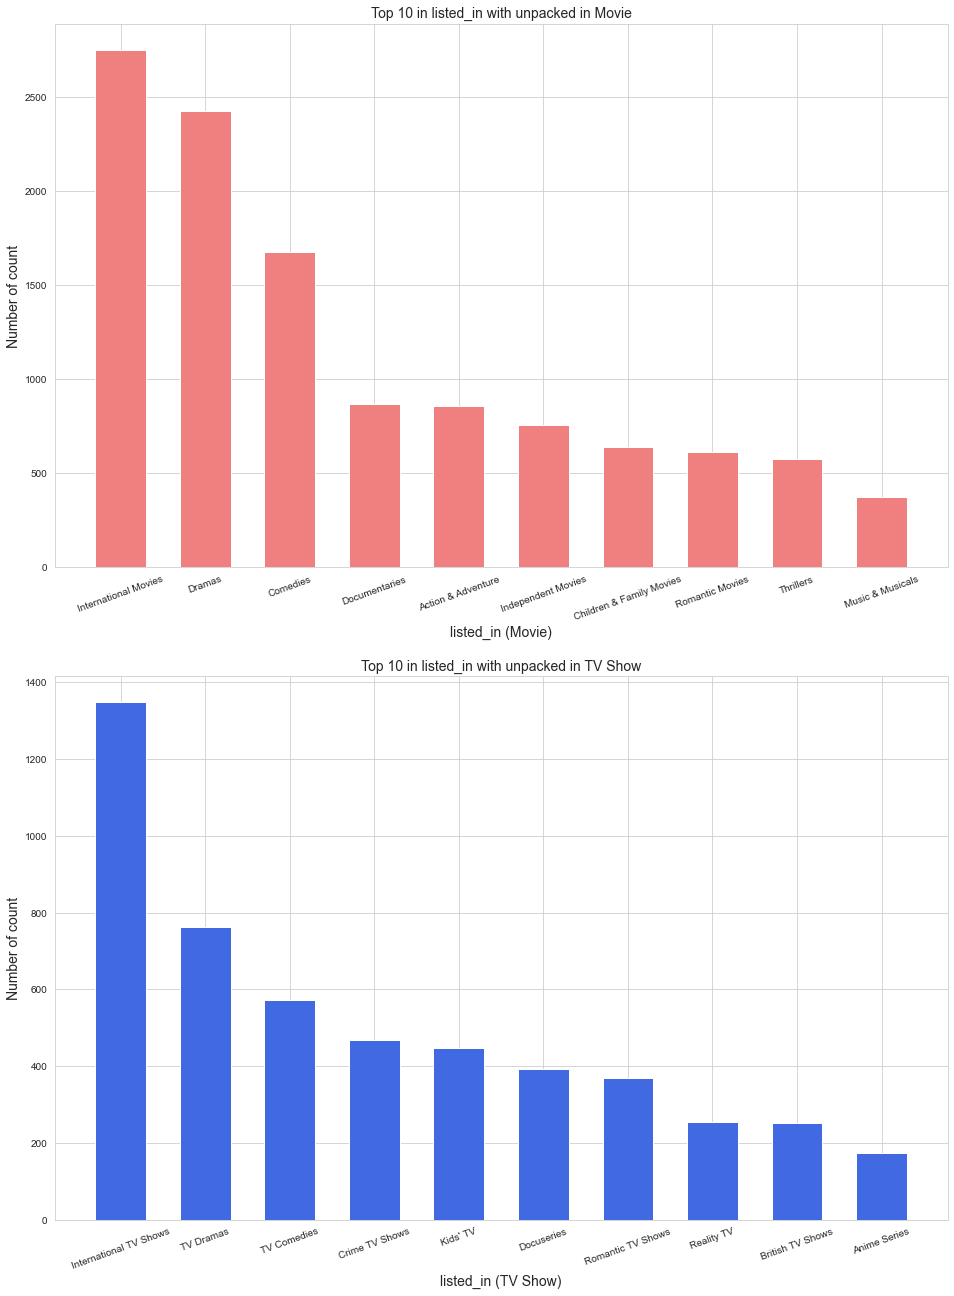

In [32]:
# seprate them between TV shows and Movies
colname = 'listed_in'
fig,axs = plt.subplots(2,1,figsize = (16, 22))
for ii,key in enumerate(list(colors_movietv.keys())):
    df_key = df[df['type'] == key]
    df_tmp = getunpackedvals(df_key,colname)
    print("Unique values in '{}': {}\n".format(colname,len(df_tmp[colname].unique())))
    print('The ' + colname +' with top 10 movie/tv shows:\n')
    # bar plot for the top 10 directors
    rowidx = range(0,10)
    axs[ii].bar(df_tmp[colname].value_counts()[rowidx].index, df_tmp[colname].value_counts()[rowidx].values,
            color =colors_movietv[key], width = 0.6) 
    axs[ii].set_xlabel(colname +' (' + key + ')',fontsize=14)
    axs[ii].set_xticklabels(df_tmp[colname].value_counts()[rowidx].index,rotation=20)
    axs[ii].set_ylabel('Number of count',fontsize=14)
    axs[ii].set_title("Top 10 in " + colname + ' with unpacked in ' + key,fontsize=14)
fig.savefig('figures/top10' + colname +'unpacked' + key.replace(' ','') +'.png')

##### International, drama,comedies, are the to 3 categories

In [33]:
# The column: description
import wordcloud
from wordcloud import WordCloud, STOPWORDS
colname = 'description'
# Create a wordcloud of the description
#df['title'] = movies['title'].fillna("").astype('str')
description_corpus = ' '.join(df[colname])
description_wordcloud = WordCloud(stopwords=STOPWORDS, 
                                  background_color='black', height=2000, width=4000).generate(description_corpus)

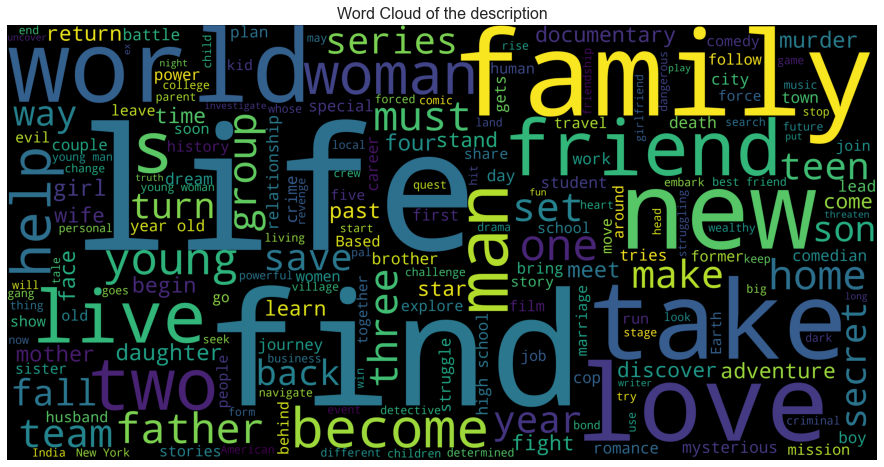

In [34]:
# Plot the wordcloud
fig = plt.figure(figsize=(16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.title('Word Cloud of the ' + colname, fontsize=16)
plt.show()
fig.savefig('figures/' + colname +'wordcloud' +'.png')

In [71]:
list(description_wordcloud.words_.items())[0:10]

[('life', 1.0),
 ('find', 0.8387533875338753),
 ('family', 0.8143631436314364),
 ('new', 0.6978319783197832),
 ('take', 0.6951219512195121),
 ('love', 0.6666666666666666),
 ('world', 0.6626016260162602),
 ('friend', 0.5867208672086721),
 ('two', 0.5257452574525745),
 ('live', 0.5257452574525745)]

#### The life, find, family, new,take,love have the most occurrence

## The End of the EDA

## The Start of Recommendation

### Since I only have movie and TV show data and no rates from audience, I will build a content-based recommendation system

- Recommendation only on the same type of data: TV show or Movie
- Recommendation on combined Movie and TV show data

In [36]:
df.head()

type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water           nodata   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans           nodata   
4  TV Show           Kota Factory           nodata   

                                                cast        country  \
0                                             nodata  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                             nodata  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description date_addeddt  year_added  \
0  As her father nears the end of his life, filmm...   2021-09-25        2021   
1  After crossing paths at a party, a Cape Town t...   2021-09-24        2021   
2  To protect his family from a powerful drug lor...   2021-09-24        2021   
3  Feuds, flirtations and toilet talk go down amo...   2021-09-24        2021   
4  In a city of coaching centers known to train I...   2021-09-24        2021   

   duration_time  
0             90  
1              2  
2              1  
3              1  
4              2

#### The features used for recommendation
- director
- cast
- rating
- listed_in
- description

In [37]:
# Create feature combinations
from itertools import combinations
possible_features = ['director','cast','rating','listed_in','description']
list_combinations = list()
for n in range(len(possible_features) + 1):
    list_combinations += list(combinations(possible_features, n))
     #print(list_combinations)
feat_combs = list_combinations[list(len(list_combination) > 3 for list_combination in list_combinations).index(True):]
print('Selected feature combinations:')
print(feat_combs)

Selected feature combinations:
[('director', 'cast', 'rating', 'listed_in'), ('director', 'cast', 'rating', 'description'), ('director', 'cast', 'listed_in', 'description'), ('director', 'rating', 'listed_in', 'description'), ('cast', 'rating', 'listed_in', 'description'), ('director', 'cast', 'rating', 'listed_in', 'description')]


In [56]:
# make the comb_feats as a dictionary
feat_combsdict = dict()
for ii in range(len(feat_combs)):
    feat_combsdict['comb_features' + str(ii)] = feat_combs[ii]
feat_combsdict

{'comb_features0': ('director', 'cast', 'rating', 'listed_in'),
 'comb_features1': ('director', 'cast', 'rating', 'description'),
 'comb_features2': ('director', 'cast', 'listed_in', 'description'),
 'comb_features3': ('director', 'rating', 'listed_in', 'description'),
 'comb_features4': ('cast', 'rating', 'listed_in', 'description'),
 'comb_features5': ('director', 'cast', 'rating', 'listed_in', 'description')}

In [39]:
# The comma needs to be removed
def remove_comma(x):
    if isinstance(x, list):
        return [str.lower(i.replace(",", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(",", ""))
        else:
            return ''

In [41]:
# add the combined features into the df
for ii, feat_comb in enumerate(feat_combs):
    df['comb_features'+ str(ii)] = ""
    for feat in feat_comb:
        #print(feat)
        df['comb_features'+ str(ii)] = df['comb_features'+ str(ii)] + " " + df[feat]
    df['comb_features'+ str(ii)] = df['comb_features'+ str(ii)].apply(remove_comma)

director
cast
rating
listed_in
director
cast
rating
description
director
cast
listed_in
description
director
rating
listed_in
description
cast
rating
listed_in
description
director
cast
rating
listed_in
description


type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water           nodata   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans           nodata   
4  TV Show           Kota Factory           nodata   

                                                cast        country  \
0                                             nodata  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                             nodata  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description date_addeddt  year_added  \
0  As her father nears the end of his life, filmm...   2021-09-25        2021   
1  After crossing paths at a party, a Cape Town t...   2021-09-24        2021   
2  To protect his family from a powerful drug lor...   2021-09-24        2021   
3  Feuds, flirtations and toilet talk go down amo...   2021-09-24        2021   
4  In a city of coaching centers known to train I...   2021-09-24        2021   

   duration_time                                     comb_features0  \
0             90         kirsten johnson nodata pg-13 documentaries   
1              2   nodata ama qamata khosi ngema gail mabalane t...   
2              1   julien leclercq sami bouajila tracy gotoas sa...   
3              1          nodata nodata tv-ma docuseries reality tv   
4              2   nodata mayur more jitendra kumar ranjan raj a...   

                                      comb_features1  \
0   kirsten johnson nodata pg-13 as her father ne...   
1   nodata ama qamata khosi ngema gail mabalane t...   
2   julien leclercq sami bouajila tracy gotoas sa...   
3   nodata nodata tv-ma feuds flirtations and toi...   
4   nodata mayur more jitendra kumar ranjan raj a...   

                                      comb_features2  \
0   kirsten johnson nodata documentaries as her f...   
1   nodata ama qamata khosi ngema gail mabalane t...   
2   julien leclercq sami bouajila tracy gotoas sa...   
3   nodata nodata docuseries reality tv feuds fli...   
4   nodata mayur more jitendra kumar ranjan raj a...   

                                      comb_features3  \
0   kirsten johnson pg-13 documentaries as her fa...   
1   nodata tv-ma international tv shows tv dramas...   
2   julien leclercq tv-ma crime tv shows internat...   
3   nodata tv-ma docuseries reality tv feuds flir...   
4   nodata tv-ma international tv shows romantic ...   

                                      comb_features4  \
0   nodata pg-13 documentaries as her father near...   
1   ama qamata khosi ngema gail mabalane thabang ...   
2   sami bouajila tracy gotoas samuel jouy nabiha...   
3   nodata tv-ma docuseries reality tv feuds flir...   
4   mayur more jitendra kumar ranjan raj alam kha...   

                                      comb_features5  
0   kirsten johnson nodata pg-13 documentaries as...  
1   nodata ama qamata khosi ngema gail mabalane t...  
2   julien leclercq sami bouajila tracy gotoas sa...  
3   nodata nodata tv-ma docuseries reality tv feu...  
4   nodata mayur more jitendra kumar 

In [42]:
df.head()

type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water           nodata   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans           nodata   
4  TV Show           Kota Factory           nodata   

                                                cast        country  \
0                                             nodata  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                             nodata  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description date_addeddt  year_added  \
0  As her father nears the end of his life, filmm...   2021-09-25        2021   
1  After crossing paths at a party, a Cape Town t...   2021-09-24        2021   
2  To protect his family from a powerful drug lor...   2021-09-24        2021   
3  Feuds, flirtations and toilet talk go down amo...   2021-09-24        2021   
4  In a city of coaching centers known to train I...   2021-09-24        2021   

   duration_time                                     comb_features0  \
0             90         kirsten johnson nodata pg-13 documentaries   
1              2   nodata ama qamata khosi ngema gail mabalane t...   
2              1   julien leclercq sami bouajila tracy gotoas sa...   
3              1          nodata nodata tv-ma docuseries reality tv   
4              2   nodata mayur more jitendra kumar ranjan raj a...   

                                      comb_features1  \
0   kirsten johnson nodata pg-13 as her father ne...   
1   nodata ama qamata khosi ngema gail mabalane t...   
2   julien leclercq sami bouajila tracy gotoas sa...   
3   nodata nodata tv-ma feuds flirtations and toi...   
4   nodata mayur more jitendra kumar ranjan raj a...   

                                      comb_features2  \
0   kirsten johnson nodata documentaries as her f...   
1   nodata ama qamata khosi ngema gail mabalane t...   
2   julien leclercq sami bouajila tracy gotoas sa...   
3   nodata nodata docuseries reality tv feuds fli...   
4   nodata mayur more jitendra kumar ranjan raj a...   

                                      comb_features3  \
0   kirsten johnson pg-13 documentaries as her fa...   
1   nodata tv-ma international tv shows tv dramas...   
2   julien leclercq tv-ma crime tv shows internat...   
3   nodata tv-ma docuseries reality tv feuds flir...   
4   nodata tv-ma international tv shows romantic ...   

                                      comb_features4  \
0   nodata pg-13 documentaries as her father near...   
1   ama qamata khosi ngema gail mabalane thabang ...   
2   sami bouajila tracy gotoas samuel jouy nabiha...   
3   nodata tv-ma docuseries reality tv feuds flir...   
4   mayur more jitendra kumar ranjan raj alam kha...   

                                      comb_features5  
0   kirsten johnson nodata pg-13 documentaries as...  
1   nodata ama qamata khosi ngema gail mabalane t...  
2   julien leclercq sami bouajila tracy gotoas sa...  
3   nodata nodata tv-ma docuseries reality tv feu...  
4   nodata mayur more jitendra kumar 

In [43]:
df['title']= df['title'].str.lower()

In [44]:
# Build the recommendation functions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
cv = CountVectorizer(stop_words='english')

In [45]:
# The function to suggest possible titles if the input one is not existed in the database
def get_possible_titles(title,dfall):
    temp = ''
    possible_titles = dfall['title'].copy()
    for i in title.lower():
        out = []
        temp += i
        for j in possible_titles:
            if temp in j:
                out.append(j)
        if len(out) == 0:
            return possible_titles
        out.sort()
        possible_titles = out.copy()
    return possible_titles

In [58]:
# The recommendation function based on an input title and combination feature type
def recommenddata(title,numrecmd,dfall,cv,combfeattype):
    # title: the title of movie or TV show
    if title.lower() in [tit for tit in dfall['title']]:
        # From all
        count_matall = cv.fit_transform(dfall[combfeattype])
        # From same type df
        type_title = dfall[dfall['title'] == title.lower()]
        # print('{} is a {}\n'.format(title,type_title.iloc[0]['type']))
        dfsametype = dfall[dfall['type'] == type_title.iloc[0]['type']].reset_index()
        # print(dfsametype.info())
        count_matsametype = cv.fit_transform(dfsametype[combfeattype])
        cosine_simall = cosine_similarity(count_matall)
        cosine_simsametype = cosine_similarity(count_matsametype)
        # print(cosine_simsametype.shape)
        indices_all = pd.Series(dfall.index, index=dfall['title'])
        indices_sametype = pd.Series(dfsametype.index, index=dfsametype['title'])
        recmdres = dict()
        for ii in range(2):
            if ii == 0:
                idx = indices_all[title.lower()]
                sim_scores = list(enumerate(cosine_simall[idx]))
                dfsel = dfall
                typesel = 'all'
            else:
                idx = indices_sametype[title.lower()]
                sim_scores = list(enumerate(cosine_simsametype[idx]))
                dfsel = dfsametype
                typesel = dfsel.iloc[0]['type']
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:numrecmd+1]
            #print(sim_scores)
            recmd_indices = [i[0] for i in sim_scores]
            #recmd_list = dfsel['title'].iloc[recmd_indices]
            print('Recommended items in {} for \'{}\' in decending order \nbased on {}={}'.
                  format(typesel,title,combfeattype,feat_combsdict[combfeattype]))
            print('-'*(56+len(title)))
            dftmp = dfsel.iloc[recmd_indices][['title','type']]
            dftmp['sim_scores'] = [i[1] for i in sim_scores]
            if ii == 0:
                recmdres['all'] = dftmp
            else:
                recmdres['sametype'] = dftmp
                #print(dfsel.iloc[recmd_indices][['title','type']])
            print(dftmp)
           # print(*recmd_list, sep = "\n")
            print('-'*(56+len(title)) +'\n')
        return recmdres
    else:
        possible_titles = get_possible_titles(title,dfall)
        print('We have nothing to recommend for \'{}\' at that time, since it is not existed in the database.\n
        Try with other similar movies:\n {}.'.format(title,possible_titles))

In [59]:
# test the input title is not existed in the database
title_input = 'Gangland'#df.iloc[10].title
comb_feattype = 'comb_features5'
recmdres = recommenddata(title_input,10,df,cv,comb_feattype)

We have nothing to recommend for 'Gangland' at that time, since it is not existed in the database.
Try with other similar movies:
 ['ganglands'].


In [60]:
title_input = 'Ganglands'#df.iloc[10].title
comb_feattype = 'comb_features5'
recmdres = recommenddata(title_input,10,df,cv,comb_feattype)

Recommended items in all for 'Ganglands' in decending order 
based on comb_features5=('director', 'cast', 'rating', 'listed_in', 'description')
-----------------------------------------------------------------
                                           title     type  sim_scores
3976                      the eagle of el-se'eed  TV Show    0.486854
3789                              killer ratings  TV Show    0.481932
6741                               fatal destiny  TV Show    0.471010
7017  how to live mortgage free with sarah beeny  TV Show    0.471010
749                                l.a.’s finest  TV Show    0.467735
5157                                       argon  TV Show    0.458220
5278                                     apaches  TV Show    0.454183
697            elite short stories: carla samuel  TV Show    0.453572
4752                                     smoking  TV Show    0.453572
7538                              my hotter half  TV Show    0.450806
--------------------

#### it seems the recommendation based on the same type or both types are generally similar, after several tries on different titles

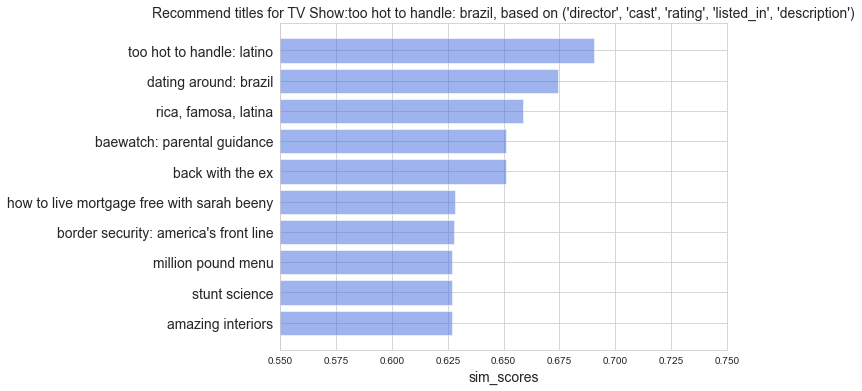

In [68]:
# Visualization for the same type one:
recmdtype = 'sametype'
y_pos = np.arange(recmdres[recmdtype].shape[0])
fig = plt.figure(figsize=(8,6))
plt.barh(y_pos, recmdres[recmdtype].sim_scores, align='center', alpha=0.5,
         color= colors_movietv[recmdres['sametype'].iloc[0].type])
plt.yticks(y_pos, recmdres[recmdtype].title,fontsize=14)
plt.xlim(round(recmdres[recmdtype].sim_scores.min(),1)-0.05,round(recmdres[recmdtype].sim_scores.max(),1)+0.05)
plt.xlabel('sim_scores',fontsize=14)
plt.gca().invert_yaxis()
plt.title('Recommend titles for {}:{}, based on {}'.format(recmdres['sametype'].iloc[0].type,
                                                           title_input,feat_combsdict[comb_feattype]),fontsize=14)
plt.show()
titname = title_input.replace(' ','')
titname = titname.replace(':','')
fig.savefig('figures/top' + str(recmdres[recmdtype].shape[0]) +'recomdtitles_' + titname +'.png')

In [65]:
# test by using different combination features
title_input = 'too hot to handle: brazil'#df.iloc[10].title
recmdresdifcomb = dict()
recmdresdifcombdf = pd.DataFrame()
for ii,comb_feattype in enumerate(feat_combsdict.keys()):
    recmdresdifcomb[comb_feattype] = recommenddata(title_input,10,df,cv,comb_feattype)
    recmdresdifcombdf[comb_feattype] = [i for i in recmdresdifcomb[comb_feattype]['sametype'].title]

Recommended items in all for 'too hot to handle: brazil' in decending order 
based on comb_features0=('director', 'cast', 'rating', 'listed_in')
---------------------------------------------------------------------------------
                                            title     type  sim_scores
4199                             back with the ex  TV Show    0.945611
70                      too hot to handle: latino  TV Show    0.925926
1093                                  the big day  TV Show    0.909241
2101                  baewatch: parental guidance  TV Show    0.909241
3558                           million pound menu  TV Show    0.909241
4508                                stunt science  TV Show    0.909241
4807  churchill’s secret agents: the new recruits  TV Show    0.909241
7017   how to live mortgage free with sarah beeny  TV Show    0.909241
8235                                  the calling  TV Show    0.894427
675                                     rea(l)ove  TV Show    0

Recommended items in all for 'too hot to handle: brazil' in decending order 
based on comb_features5=('director', 'cast', 'rating', 'listed_in', 'description')
---------------------------------------------------------------------------------
                                           title     type  sim_scores
70                     too hot to handle: latino  TV Show    0.690672
2245                       dating around: brazil  TV Show    0.674419
7867                        rica, famosa, latina  TV Show    0.658869
2101                 baewatch: parental guidance  TV Show    0.651028
4199                            back with the ex  TV Show    0.651028
7017  how to live mortgage free with sarah beeny  TV Show    0.628419
3053       border security: america's front line  TV Show    0.627907
3558                          million pound menu  TV Show    0.626916
4508                               stunt science  TV Show    0.626916
4758                           amazing interiors  TV Show 

In [66]:
 recmdresdifcombdf

comb_features0             comb_features1  \
0                             back with the ex          too hot to handle   
1                    too hot to handle: latino               bling empire   
2                                  the big day       we are the champions   
3                  baewatch: parental guidance  too hot to handle: latino   
4                           million pound menu    the movies that made us   
5                                stunt science       rica, famosa, latina   
6  churchill’s secret agents: the new recruits          the circle brazil   
7   how to live mortgage free with sarah beeny      dating around: brazil   
8                                  the calling                   westside   
9                                    rea(l)ove                diva brides   

                          comb_features2               comb_features3  \
0                  dating around: brazil    too hot to handle: latino   
1              too hot to handle: latino         rica, famosa, latina   
2                   rica, famosa, latina        dating around: brazil   
3  border security: america's front line                       teresa   
4            baewatch: parental guidance  baewatch: parental guidance   
5                       back with the ex             back with the ex   
6                      amazing interiors            too hot to handle   
7                         my hotter half                   i hear you   
8                            the big day                 age gap love   
9                       the bachelorette               my hotter half   

                               comb_features4  \
0                   too hot to handle: latino   
1                       dating around: brazil   
2                        rica, famosa, latina   
3                 baewatch: parental guidance   
4                            back with the ex   
5                                age gap love   
6                           too hot to handle   
7  how to live mortgage free with sarah beeny   
8       border security: america's front line   
9                          million pound menu   

                               comb_features5  
0                   too hot to handle: latino  
1                       dating around: brazil  
2                        rica, famosa, latina  
3                 baewatch: parental guidance  
4                            back with the ex  
5  how to live mortgage free with sarah beeny  
6       border security: america's front line  
7                          million pound menu  
8                               stunt science  
9                           amazing interiors

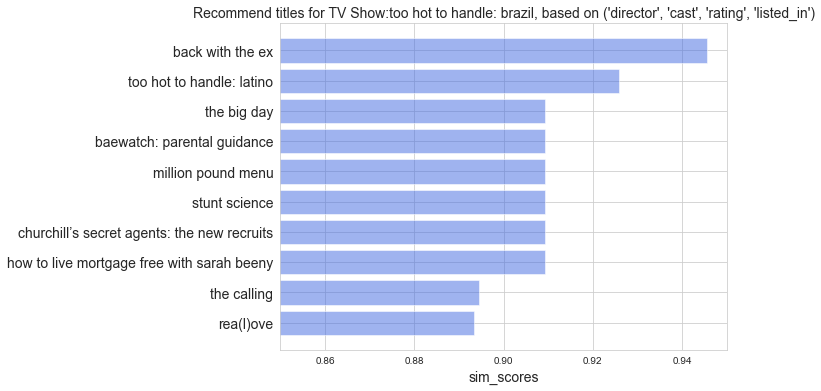

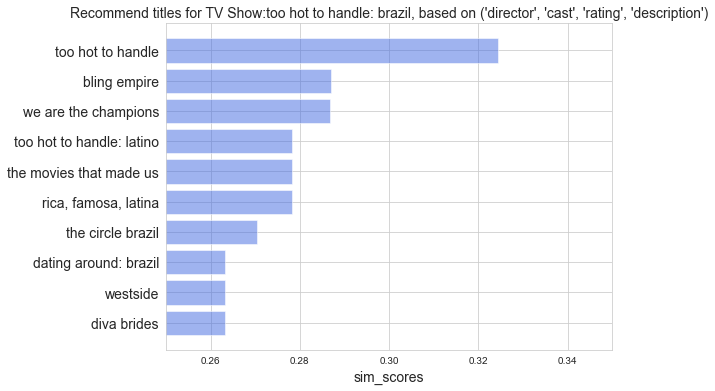

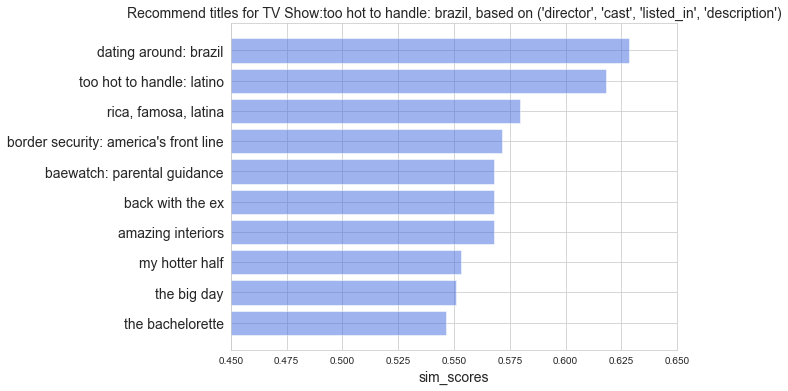

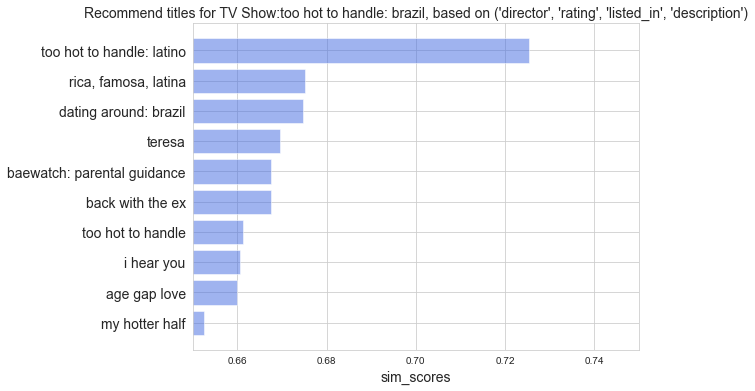

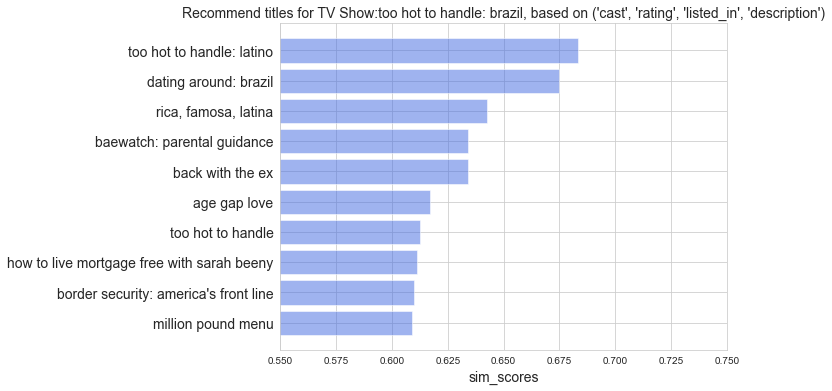

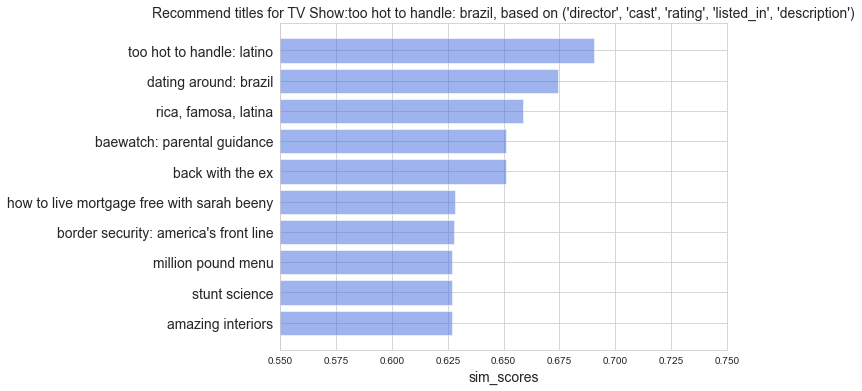

In [69]:
# Visualization for the same type one:
recmdtype = 'sametype'
for ii,comb_feat in enumerate(recmdresdifcomb.keys()):
    recmdres = recmdresdifcomb[comb_feat]
    y_pos = np.arange(recmdres[recmdtype].shape[0])
    fig = plt.figure(figsize=(8,6))
    plt.barh(y_pos, recmdres[recmdtype].sim_scores, align='center', alpha=0.5,
    color= colors_movietv[recmdres['sametype'].iloc[0].type])
    plt.yticks(y_pos, recmdres[recmdtype].title,fontsize=14)
    plt.xlim(round(recmdres[recmdtype].sim_scores.min(),1)-0.05,round(recmdres[recmdtype].sim_scores.max(),1)+0.05)
    plt.xlabel('sim_scores',fontsize=14)
    plt.gca().invert_yaxis()
    plt.title('Recommend titles for {}:{}, based on {}'.format(recmdres['sametype'].iloc[0].type,
                                                                       title_input,feat_combsdict[comb_feat]),fontsize=14)
    plt.show()
    titname = title_input.replace(' ','')
    titname = titname.replace(':','')
    fig.savefig('figures/top' + str(recmdres[recmdtype].shape[0]) +'recomdtitles_' + titname + comb_feat +'.png')

#### Different combinations of features generally recommend the similar titles

## Final results of two examples

Recommended items in all for 'love on the spectrum' in decending order 
based on comb_features5=('director', 'cast', 'rating', 'listed_in', 'description')
----------------------------------------------------------------------------
                                            title     type  sim_scores
2982                                find yourself  TV Show    0.594684
4807  churchill’s secret agents: the new recruits  TV Show    0.568815
3053        border security: america's front line  TV Show    0.566365
430                                   sexy beasts  TV Show    0.553637
366                                       glow up  TV Show    0.551014
2495           especial 20 años fútbol de primera  TV Show    0.551014
1093                                  the big day  TV Show    0.544415
7438             melodies of life - born this way  TV Show    0.544415
7867                         rica, famosa, latina  TV Show    0.544415
2165                          world's most wanted  TV Show

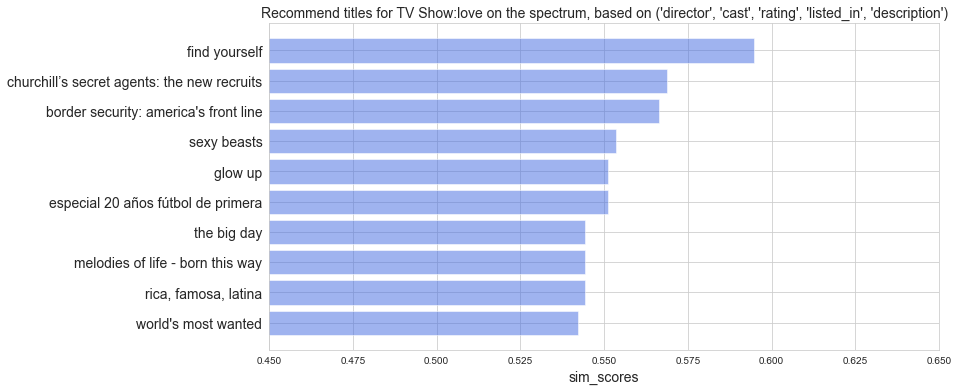

In [77]:
# A TV show
title_input = df.iloc[25].title
comb_feattype = 'comb_features5'
recmdres = recommenddata(title_input,10,df,cv,comb_feattype)
recmdtype = 'all'#'sametype'
y_pos = np.arange(recmdres[recmdtype].shape[0])
fig = plt.figure(figsize=(12,6))
plt.barh(y_pos, recmdres[recmdtype].sim_scores, align='center', alpha=0.5,
         color= colors_movietv[recmdres['sametype'].iloc[0].type])
plt.yticks(y_pos, recmdres[recmdtype].title,fontsize=14)
plt.xlim(round(recmdres[recmdtype].sim_scores.min(),1)-0.05,round(recmdres[recmdtype].sim_scores.max(),1)+0.05)
plt.xlabel('sim_scores',fontsize=14)
plt.gca().invert_yaxis()
plt.title('Recommend titles for {}:{}, based on {}'.format(recmdres['sametype'].iloc[0].type,
                                                           title_input,feat_combsdict[comb_feattype]),fontsize=14)
plt.show()
titname = title_input.replace(' ','')
titname = titname.replace(':','')
fig.savefig('figures/top' + str(recmdres[recmdtype].shape[0]) +'recomdtitles_' + titname +'.png')


Recommended items in all for 'jeans' in decending order 
based on comb_features5=('director', 'cast', 'rating', 'listed_in', 'description')
-------------------------------------------------------------
                     title   type  sim_scores
4474          santo cachón  Movie    0.365636
3224   evvarikee cheppoddu  Movie    0.363803
5309         sohni mahiwal  Movie    0.356512
7099        ishqedarriyaan  Movie    0.336336
2082  maniyarayile ashokan  Movie    0.325396
3153          okafor's law  Movie    0.321839
7249      kyun! ho gaya na  Movie    0.318018
2442               x large  Movie    0.314414
7243             kuppivala  Movie    0.314414
1891    a chaster marriage  Movie    0.310253
-------------------------------------------------------------

Recommended items in Movie for 'jeans' in decending order 
based on comb_features5=('director', 'cast', 'rating', 'listed_in', 'description')
-------------------------------------------------------------
                     titl

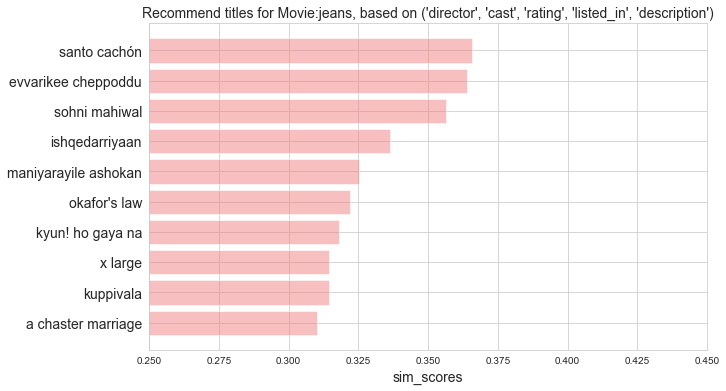

In [76]:
 # An example for a movie
title_input = df[df['type']== 'Movie'].iloc[10].title
comb_feattype = 'comb_features5'
recmdres = recommenddata(title_input,10,df,cv,comb_feattype)
recmdtype = 'all'#'sametype'
y_pos = np.arange(recmdres[recmdtype].shape[0])
fig = plt.figure(figsize=(10,6))
plt.barh(y_pos, recmdres[recmdtype].sim_scores, align='center', alpha=0.5,
             color= colors_movietv[recmdres['sametype'].iloc[0].type])
plt.yticks(y_pos, recmdres[recmdtype].title,fontsize=14)
plt.xlim(round(recmdres[recmdtype].sim_scores.min(),1)-0.05,round(recmdres[recmdtype].sim_scores.max(),1)+0.05)
plt.xlabel('sim_scores',fontsize=14)
plt.gca().invert_yaxis()
plt.title('Recommend titles for {}:{}, based on {}'.format(recmdres['sametype'].iloc[0].type,
                                                       title_input,feat_combsdict[comb_feattype]),fontsize=14)
plt.show()
titname = title_input.replace(' ','')
titname = titname.replace(':','')
fig.savefig('figures/top' + str(recmdres[recmdtype].shape[0]) +'recomdtitles_' + titname +'.png')